## Preprocessing of data tables

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns


## Cleaning categorical data (surveys)

First I need to clean the surveys 2016/2018/2020 tables, as they have around 7000-8000 columns and, from these, I will be using only a few. To do so, I use the column name descriptions (that I downloaded from the website), reserve the ones I need, and clean up the table.

I will use only a few that can be interesting, and related to health:
- Age
- Gender
- Life satisfaction
- High blood pressure
- Diabetes
- Cancer
- Lung disease
- Heart condiiton
- Stroke
- Psychiatric problems
- Dementia
- Cholesterol
- Weight (pounds)

In [ ]:
#Note that this part only work for me as I have the original (huge) survey tables, I'll put in comment (#)
# just in case anyone press Run All

# Specify the file location
#file_loc = "./data/survey_2016.xlsx"

#df_survey_2016 = pd.read_excel(file_loc, index_col=None, na_values=['NA'], usecols=["HHIDPN","HHID","PA019","PB000","PC005","PC010","PC018", "PC030", "PC036",
#                                                                                    "PC053","PC065","PC273","PC283","PC139"])
# Print the DataFrame
#df_survey_2016



It took so long so I want to export this for future uses.

In [ ]:
# Export the DataFrame to Excel
#output_file = "./data/df_survey_2016.xlsx"
#df_survey_2016.to_excel(output_file, index=False)

In [2]:
df_survey_2016 = pd.read_excel("./data/df_survey_2016.xlsx")
df_survey_2016

,HHIDPN,HHID,PA019,PX060_R,PB000,PC005,PC010,PC018,PC030,PC036,PC053,PC065,PC273,PC283,PC139
0,10001010,10001,76,1,2.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,140.0
1,10003030,10003,60,2,2.0,1,5.0,5.0,5.0,4.0,5.0,1.0,5.0,5.0,190.0
2,10004040,10004,70,2,1.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,150.0
3,10013040,10013,68,2,3.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,131.0
4,10038010,10038,79,1,2.0,1,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20907,923525010,923525,59,2,2.0,1,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,148.0
20908,923525020,923525,61,1,2.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,155.0
20909,952836010,952836,56,2,2.0,5,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,151.0
20910,958361010,958361,51,1,3.0,5,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,180.0


In [3]:
#Rename columns 
column_mapping = {
    "HHIDPN": "HHIDPN",
    "HHID": "HHID",
    "PA019": "age_2016",
    "PX060_R": "gender_2016",
    "PB000": "life_satisfaction_2016",
    "PC005": "high_blood_pressure_2016",
    "PC010": "diabetes_2016",
    "PC018": "cancer_2016",
    "PC030": "lung_disease_2016",
    "PC036": "heart_condition_2016",
    "PC053": "stroke_2016",
    "PC065": "psych_problems_2016",
    "PC273": "dementia_2016",
    "PC283": "cholesterol_2016",
    "PC139": "weight_2016"
}

# Rename the columns using the mapping
df_survey_2016.rename(columns=column_mapping, inplace=True)
df_survey_2016

,HHIDPN,HHID,age_2016,gender_2016,life_satisfaction_2016,high_blood_pressure_2016,diabetes_2016,cancer_2016,lung_disease_2016,heart_condition_2016,stroke_2016,psych_problems_2016,dementia_2016,cholesterol_2016,weight_2016
0,10001010,10001,76,1,2.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,140.0
1,10003030,10003,60,2,2.0,1,5.0,5.0,5.0,4.0,5.0,1.0,5.0,5.0,190.0
2,10004040,10004,70,2,1.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,150.0
3,10013040,10013,68,2,3.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,131.0
4,10038010,10038,79,1,2.0,1,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20907,923525010,923525,59,2,2.0,1,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,148.0
20908,923525020,923525,61,1,2.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,155.0
20909,952836010,952836,56,2,2.0,5,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,151.0
20910,958361010,958361,51,1,3.0,5,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,180.0


In [4]:
#Values equal to >1 mean NO and values equal to 1 mean YES so I change to strings.
# Define the columns that need to be converted
binary_columns = ["high_blood_pressure_2016", "diabetes_2016", "cancer_2016", 
                  "lung_disease_2016", "heart_condition_2016", "stroke_2016",
                  "psych_problems_2016", "dementia_2016","cholesterol_2016"]

# Replace values in specified columns
df_survey_2016[binary_columns] = df_survey_2016[binary_columns].replace({1: "YES", 5: "NO", 4: "NO", 3: "NO", 2: "NO", 6: "NO", 7: "NO", 8: "NO",9: "NO",})

df_survey_2016["gender_2016"] = df_survey_2016["gender_2016"].replace({1: "Male", 2: "Female"})

satisfaction_mapping = {
    1: "COMPLETELY SATISFIED",
    2: "VERY SATISFIED",
    3: "SOMEWHAT SATISFIED",
    4: "NOT VERY SATISFIED",
    5: "NOT AT ALL SATISFIED"
}
df_survey_2016["life_satisfaction_2016"] = df_survey_2016["life_satisfaction_2016"].replace(satisfaction_mapping)


df_survey_2016


,HHIDPN,HHID,age_2016,gender_2016,life_satisfaction_2016,high_blood_pressure_2016,diabetes_2016,cancer_2016,lung_disease_2016,heart_condition_2016,stroke_2016,psych_problems_2016,dementia_2016,cholesterol_2016,weight_2016
0,10001010,10001,76,Male,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,140.0
1,10003030,10003,60,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,YES,NO,NO,190.0
2,10004040,10004,70,Female,COMPLETELY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,150.0
3,10013040,10013,68,Female,SOMEWHAT SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,131.0
4,10038010,10038,79,Male,VERY SATISFIED,YES,NO,NO,NO,YES,NO,NO,NO,NO,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20907,923525010,923525,59,Female,VERY SATISFIED,YES,NO,NO,NO,NO,YES,NO,NO,YES,148.0
20908,923525020,923525,61,Male,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,155.0
20909,952836010,952836,56,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,YES,151.0
20910,958361010,958361,51,Male,SOMEWHAT SATISFIED,NO,NO,NO,NO,YES,NO,NO,NO,NO,180.0


In [5]:
df_survey_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20912 entries, 0 to 20911
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HHIDPN                    20912 non-null  int64  
 1   HHID                      20912 non-null  int64  
 2   age_2016                  20912 non-null  int64  
 3   gender_2016               20912 non-null  object 
 4   life_satisfaction_2016    19971 non-null  object 
 5   high_blood_pressure_2016  20912 non-null  object 
 6   diabetes_2016             20911 non-null  object 
 7   cancer_2016               20911 non-null  object 
 8   lung_disease_2016         20911 non-null  object 
 9   heart_condition_2016      20911 non-null  object 
 10  stroke_2016               20911 non-null  object 
 11  psych_problems_2016       20911 non-null  object 
 12  dementia_2016             20601 non-null  object 
 13  cholesterol_2016          20911 non-null  object 
 14  weight

In [6]:
output_file = "./data/df_survey_2016_clean.xlsx"
df_survey_2016.to_excel(output_file, index=False)

I do exactly the same with the following surveys (2018 and 2020)

In [ ]:
#Note that this part only work for me as I have the original (huge) survey tables, I'll put in comment (#)
# just in case anyone press Run All

# Specify the file location
#file_loc = "./data/survey_2018.xlsx"

#df_survey_2018 = pd.read_excel(file_loc, index_col=None, na_values=['NA'], usecols=["HHIDPN","HHID","QA019","QB000","QC005","QC010","QC018", "QC030", "QC036",
#                                                                                    "QC053","QC065","QC273","QC283","QC139"])
# Print the DataFrame
#df_survey_2018


In [93]:
# Export the DataFrame to Excel
#output_file = "./data/df_survey_2018.xlsx"
#df_survey_2018.to_excel(output_file, index=False)

In [7]:
df_survey_2018 = pd.read_excel("./data/df_survey_2018.xlsx")
df_survey_2018

,HHIDPN,HHID,QA019,QX060_R,QB000,QC005,QC010,QC018,QC030,QC036,QC053,QC065,QC273,QC283,QC139
0,10003030,10003,62,2,3.0,1,5.0,5,5,5,5,1,5.0,1,200.0
1,10004040,10004,72,2,1.0,1,5.0,5,5,5,5,5,5.0,5,160.0
2,10013040,10013,70,2,2.0,5,5.0,5,5,5,5,5,5.0,1,140.0
3,10038010,10038,81,1,2.0,1,5.0,5,5,1,5,5,5.0,5,155.0
4,10038040,10038,75,2,2.0,5,5.0,5,5,5,5,5,5.0,5,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17141,923498010,923498,62,2,2.0,5,5.0,5,5,5,5,5,5.0,5,196.0
17142,923525010,923525,61,2,2.0,1,5.0,5,5,5,1,5,5.0,1,145.0
17143,923525020,923525,63,1,1.0,5,5.0,5,5,5,5,5,5.0,5,160.0
17144,952836010,952836,58,2,2.0,5,1.0,5,5,5,5,5,5.0,1,148.0


In [8]:
#Rename columns 
column_mapping = {
    "HHIDPN": "HHIDPN",
    "HHID": "HHID",
    "QA019": "age_2018",
    "QX060_R": "gender_2018",
    "QB000": "life_satisfaction_2018",
    "QC005": "high_blood_pressure_2018",
    "QC010": "diabetes_2018",
    "QC018": "cancer_2018",
    "QC030": "lung_disease_2018",
    "QC036": "heart_condition_2018",
    "QC053": "stroke_2018",
    "QC065": "psych_problems_2018",
    "QC273": "dementia_2018",
    "QC283": "cholesterol_2018",
    "QC139": "weight_2018"
}

# Rename the columns using the mapping
df_survey_2018.rename(columns=column_mapping, inplace=True)
df_survey_2018

,HHIDPN,HHID,age_2018,gender_2018,life_satisfaction_2018,high_blood_pressure_2018,diabetes_2018,cancer_2018,lung_disease_2018,heart_condition_2018,stroke_2018,psych_problems_2018,dementia_2018,cholesterol_2018,weight_2018
0,10003030,10003,62,2,3.0,1,5.0,5,5,5,5,1,5.0,1,200.0
1,10004040,10004,72,2,1.0,1,5.0,5,5,5,5,5,5.0,5,160.0
2,10013040,10013,70,2,2.0,5,5.0,5,5,5,5,5,5.0,1,140.0
3,10038010,10038,81,1,2.0,1,5.0,5,5,1,5,5,5.0,5,155.0
4,10038040,10038,75,2,2.0,5,5.0,5,5,5,5,5,5.0,5,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17141,923498010,923498,62,2,2.0,5,5.0,5,5,5,5,5,5.0,5,196.0
17142,923525010,923525,61,2,2.0,1,5.0,5,5,5,1,5,5.0,1,145.0
17143,923525020,923525,63,1,1.0,5,5.0,5,5,5,5,5,5.0,5,160.0
17144,952836010,952836,58,2,2.0,5,1.0,5,5,5,5,5,5.0,1,148.0


In [9]:
#Values equal to >1 mean NO and values equal to 1 mean YES so I change to strings.
# Define the columns that need to be converted
binary_columns = ["high_blood_pressure_2018", "diabetes_2018", "cancer_2018", 
                  "lung_disease_2018", "heart_condition_2018", "stroke_2018",
                  "psych_problems_2018", "dementia_2018","cholesterol_2018"]

# Replace values in specified columns
df_survey_2018[binary_columns] = df_survey_2018[binary_columns].replace({1: "YES", 5: "NO", 4: "NO", 3: "NO", 2: "NO", 6: "NO", 7: "NO", 8: "NO",9: "NO",})

df_survey_2018["gender_2018"] = df_survey_2018["gender_2018"].replace({1: "Male", 2: "Female"})

satisfaction_mapping = {
    1: "COMPLETELY SATISFIED",
    2: "VERY SATISFIED",
    3: "SOMEWHAT SATISFIED",
    4: "NOT VERY SATISFIED",
    5: "NOT AT ALL SATISFIED"
}
df_survey_2018["life_satisfaction_2018"] = df_survey_2018["life_satisfaction_2018"].replace(satisfaction_mapping)


df_survey_2018

,HHIDPN,HHID,age_2018,gender_2018,life_satisfaction_2018,high_blood_pressure_2018,diabetes_2018,cancer_2018,lung_disease_2018,heart_condition_2018,stroke_2018,psych_problems_2018,dementia_2018,cholesterol_2018,weight_2018
0,10003030,10003,62,Female,SOMEWHAT SATISFIED,YES,NO,NO,NO,NO,NO,YES,NO,YES,200.0
1,10004040,10004,72,Female,COMPLETELY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,NO,160.0
2,10013040,10013,70,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,140.0
3,10038010,10038,81,Male,VERY SATISFIED,YES,NO,NO,NO,YES,NO,NO,NO,NO,155.0
4,10038040,10038,75,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17141,923498010,923498,62,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,196.0
17142,923525010,923525,61,Female,VERY SATISFIED,YES,NO,NO,NO,NO,YES,NO,NO,YES,145.0
17143,923525020,923525,63,Male,COMPLETELY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,160.0
17144,952836010,952836,58,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,YES,148.0


In [10]:
output_file = "./data/df_survey_2018_clean.xlsx"
df_survey_2018.to_excel(output_file, index=False)

In [ ]:
#Note that this part only work for me as I have the original (huge) survey tables, I'll put in comment (#)
# just in case anyone press Run All

# Specify the file location
#file_loc = "./data/survey_2020.xlsx"

#df_survey_2020 = pd.read_excel(file_loc, index_col=None, na_values=['NA'], usecols=["HHIDPN","HHID","RA019","RB000","RC005","RC010","RC018", "RC030", "RC036",
#                                                                                    "RC053","RC065","RC273","RC283","RC139"])
# Print the DataFrame
#df_survey_2020

In [ ]:
# Export the DataFrame to Excel
#output_file = "./data/df_survey_2020.xlsx"
#df_survey_2020.to_excel(output_file, index=False)

In [11]:
df_survey_2020 = pd.read_excel("./data/df_survey_2020.xlsx")
df_survey_2020

,HHIDPN,HHID,RA019,RX060_R,RB000,RC005,RC010,RC018,RC030,RC036,RC053,RC065,RC273,RC283,RC139
0,10003030,10003,64,2.0,1.0,1,5,5,1,5,5,1,NaN,1,200.0
1,10004040,10004,73,2.0,2.0,1,5,5,5,5,5,5,5.0,1,154.0
2,10013040,10013,72,2.0,2.0,1,5,5,5,5,5,5,5.0,1,138.0
3,10038010,10038,83,1.0,2.0,6,5,5,5,1,5,5,5.0,5,150.0
4,10038040,10038,77,2.0,2.0,5,5,5,5,5,5,5,5.0,1,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,923525010,923525,63,2.0,2.0,1,5,5,5,5,1,5,1.0,1,140.0
15719,923525020,923525,65,1.0,2.0,5,5,5,5,5,5,5,5.0,5,155.0
15720,952836010,952836,61,2.0,2.0,5,1,5,5,5,5,5,5.0,1,154.0
15721,958361010,958361,56,1.0,2.0,5,5,5,5,1,5,5,5.0,5,215.0


In [12]:
#Rename columns 
column_mapping = {
    "HHIDPN": "HHIDPN",
    "HHID": "HHID",
    "RA019": "age_2020",
    "RX060_R": "gender_2020",
    "RB000": "life_satisfaction_2020",
    "RC005": "high_blood_pressure_2020",
    "RC010": "diabetes_2020",
    "RC018": "cancer_2020",
    "RC030": "lung_disease_2020",
    "RC036": "heart_condition_2020",
    "RC053": "stroke_2020",
    "RC065": "psych_problems_2020",
    "RC273": "dementia_2020",
    "RC283": "cholesterol_2020",
    "RC139": "weight_2020"
}

# Rename the columns using the mapping
df_survey_2020.rename(columns=column_mapping, inplace=True)
df_survey_2020

,HHIDPN,HHID,age_2020,gender_2020,life_satisfaction_2020,high_blood_pressure_2020,diabetes_2020,cancer_2020,lung_disease_2020,heart_condition_2020,stroke_2020,psych_problems_2020,dementia_2020,cholesterol_2020,weight_2020
0,10003030,10003,64,2.0,1.0,1,5,5,1,5,5,1,NaN,1,200.0
1,10004040,10004,73,2.0,2.0,1,5,5,5,5,5,5,5.0,1,154.0
2,10013040,10013,72,2.0,2.0,1,5,5,5,5,5,5,5.0,1,138.0
3,10038010,10038,83,1.0,2.0,6,5,5,5,1,5,5,5.0,5,150.0
4,10038040,10038,77,2.0,2.0,5,5,5,5,5,5,5,5.0,1,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,923525010,923525,63,2.0,2.0,1,5,5,5,5,1,5,1.0,1,140.0
15719,923525020,923525,65,1.0,2.0,5,5,5,5,5,5,5,5.0,5,155.0
15720,952836010,952836,61,2.0,2.0,5,1,5,5,5,5,5,5.0,1,154.0
15721,958361010,958361,56,1.0,2.0,5,5,5,5,1,5,5,5.0,5,215.0


In [13]:
#Values equal to >1 mean NO and values equal to 1 mean YES so I change to strings.
# Define the columns that need to be converted
binary_columns = ["high_blood_pressure_2020", "diabetes_2020", "cancer_2020", 
                  "lung_disease_2020", "heart_condition_2020", "stroke_2020",
                  "psych_problems_2020", "dementia_2020","cholesterol_2020"]

# Replace values in specified columns
df_survey_2020[binary_columns] = df_survey_2020[binary_columns].replace({1: "YES", 5: "NO", 4: "NO", 3: "NO", 2: "NO", 6: "NO", 7: "NO", 8: "NO",9: "NO",})

df_survey_2020["gender_2020"] = df_survey_2020["gender_2020"].replace({1: "Male", 2: "Female"})

satisfaction_mapping = {
    1: "COMPLETELY SATISFIED",
    2: "VERY SATISFIED",
    3: "SOMEWHAT SATISFIED",
    4: "NOT VERY SATISFIED",
    5: "NOT AT ALL SATISFIED"
}
df_survey_2020["life_satisfaction_2020"] = df_survey_2020["life_satisfaction_2020"].replace(satisfaction_mapping)


df_survey_2020

,HHIDPN,HHID,age_2020,gender_2020,life_satisfaction_2020,high_blood_pressure_2020,diabetes_2020,cancer_2020,lung_disease_2020,heart_condition_2020,stroke_2020,psych_problems_2020,dementia_2020,cholesterol_2020,weight_2020
0,10003030,10003,64,Female,COMPLETELY SATISFIED,YES,NO,NO,YES,NO,NO,YES,NaN,YES,200.0
1,10004040,10004,73,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,YES,154.0
2,10013040,10013,72,Female,VERY SATISFIED,YES,NO,NO,NO,NO,NO,NO,NO,YES,138.0
3,10038010,10038,83,Male,VERY SATISFIED,NO,NO,NO,NO,YES,NO,NO,NO,NO,150.0
4,10038040,10038,77,Female,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,YES,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,923525010,923525,63,Female,VERY SATISFIED,YES,NO,NO,NO,NO,YES,NO,YES,YES,140.0
15719,923525020,923525,65,Male,VERY SATISFIED,NO,NO,NO,NO,NO,NO,NO,NO,NO,155.0
15720,952836010,952836,61,Female,VERY SATISFIED,NO,YES,NO,NO,NO,NO,NO,NO,YES,154.0
15721,958361010,958361,56,Male,VERY SATISFIED,NO,NO,NO,NO,YES,NO,NO,NO,NO,215.0


In [14]:
output_file = "./data/df_survey_2020_clean.xlsx"
df_survey_2020.to_excel(output_file, index=False)

Now that I have the 3 dataframes from the surveys, I am going to merge them. In this way, I will be able to identify if there are individuals who have participated in a longitudinal study, and also making it more easy to handle for subsequent correlation analyses.

But first, I'll check how many people are in common in the 3 datasets using a Venn diagram.

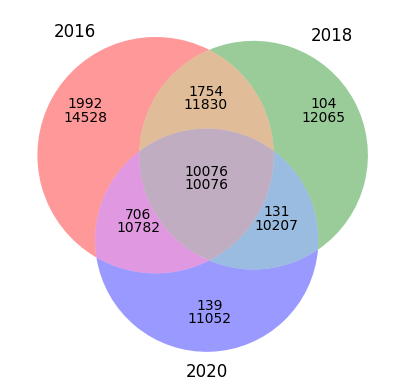

In [16]:
# Extract unique values from the specified column in each DataFrame
set1 = set(df_survey_2016["HHID"])
set2 = set(df_survey_2018["HHID"])
set3 = set(df_survey_2020["HHID"])

# Create a Venn diagram
venn_labels = {'100': len(set1 - set2 - set3), '010': len(set2 - set1 - set3),
               '110': len(set1 & set2 - set3), '001': len(set3 - set1 - set2),
               '101': len(set1 & set3 - set2), '011': len(set2 & set3 - set1),
               '111': len(set1 & set2 & set3)}

venn_result = venn3(subsets=(len(set1), len(set2), len(set1 & set2), len(set3),
                             len(set1 & set3), len(set2 & set3), len(set1 & set2 & set3)),
                    set_labels=('2016', '2018', '2020'),
                    alpha=0.4)

# Display the counts in each intersection
for idx, label in enumerate(venn_labels):
    x, y = venn_result.get_label_by_id(label).get_position()
    plt.text(x, y + 0.05, s=f"{venn_labels[label]}", ha='center', va='center')

# Show the Venn diagram
plt.show()



There are 10076 individuals in common.

I'm going to unify the 3 datasets.

In [15]:
# Merge DataFrames based on the column HHID
merged_df = pd.merge(df_survey_2016, df_survey_2018, on='HHIDPN', how='outer', suffixes=("_2016", "_2018"))
merged_df2 = pd.merge(merged_df, df_survey_2020, on='HHIDPN', how='outer')


In [16]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21856 entries, 0 to 21855
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HHIDPN                    21856 non-null  int64  
 1   HHID_2016                 20912 non-null  float64
 2   age_2016                  20912 non-null  float64
 3   gender_2016               20912 non-null  object 
 4   life_satisfaction_2016    19971 non-null  object 
 5   high_blood_pressure_2016  20912 non-null  object 
 6   diabetes_2016             20911 non-null  object 
 7   cancer_2016               20911 non-null  object 
 8   lung_disease_2016         20911 non-null  object 
 9   heart_condition_2016      20911 non-null  object 
 10  stroke_2016               20911 non-null  object 
 11  psych_problems_2016       20911 non-null  object 
 12  dementia_2016             20601 non-null  object 
 13  cholesterol_2016          20911 non-null  object 
 14  weight

In [17]:
output_file = "./data/merged_surveys.xlsx"
merged_df2.to_excel(output_file, index=False)

## Cleaning numerical data

- vbs_2016
- vbs_2_2016
- vbs_sub_2016
- cells_2016
- biomarker_2016  

*(NOTE: IN PRINCIPLE I AM NOT GOING TO PROCESS 2012 OR 2014 SINCE I HAVE NO SURVEY DATA AND NEAITHER COGNITIVE DATA AS IT WON'T BE INFORMATIVE FOR MY ANALYSIS)*


I am not going to delete a row if some measures from the same patient are emptz as the rest of the information is interesting.

### Venous blood study from 2016

In [134]:
vbs_2016 = pd.read_excel("./data/vbs_2016.xlsx")

vbs_2016

,HHID,PN,PABAS,PAEOS,PALB,PALKP2,PALT,PALYM,PAMON,PANEU,...,PRDW,PTGF,PTP,PWBC,PVBSWGTR,PVBSWHY0WGT,PVBS_N_DAYS,PCMVGINT,PFASTYN,VERSION
0,10013,40,0.1,0.3,4.1,50.0,15.0,3.9,1.0,6.7,...,16.3,95.0,7.2,11.9,21019.066406,1,46,3.0,1.0,1
1,10038,10,0.0,0.1,4.0,48.0,16.0,1.5,0.5,3.9,...,12.8,91.0,6.8,6.0,9353.600586,1,38,2.0,1.0,1
2,10038,40,0.0,0.2,4.1,89.0,21.0,1.1,0.4,3.6,...,14.9,89.0,7.3,5.4,9941.909180,1,36,2.0,5.0,1
3,10075,20,0.0,0.2,4.3,77.0,27.0,3.0,0.5,3.7,...,14.8,191.0,7.5,7.3,5188.094238,1,121,3.0,5.0,1
4,10147,10,0.0,0.1,3.6,64.0,12.0,1.6,0.3,1.9,...,13.5,96.0,6.6,4.0,12060.642578,1,34,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,923333,10,0.1,0.2,3.8,74.0,26.0,2.5,0.6,4.6,...,13.3,76.0,7.3,7.9,0.000000,2,38,3.0,1.0,1
9930,923489,20,0.1,0.3,4.2,81.0,15.0,3.8,0.8,5.2,...,14.4,147.0,7.7,10.1,0.000000,3,44,3.0,5.0,1
9931,923498,10,0.1,0.1,4.2,87.0,19.0,2.4,0.5,4.9,...,12.4,109.0,7.0,8.0,1753.644653,1,43,2.0,5.0,1
9932,952836,10,0.1,0.1,4.3,136.0,28.0,1.6,0.3,2.4,...,14.9,105.0,7.4,4.5,1669.754761,1,51,3.0,1.0,1


In [135]:
#Delete some columns that are not interesting to me
columns_to_delete = ['PVBSWGTR', 'PVBSWHY0WGT', 'PVBS_N_DAYS', 'PCMVGINT', 'PFASTYN', 'VERSION', 'PN']

# Delete specified columns
vbs_2016 = vbs_2016.drop(columns=columns_to_delete, errors='ignore')

vbs_2016

,HHID,PABAS,PAEOS,PALB,PALKP2,PALT,PALYM,PAMON,PANEU,PAST,...,PNA,PNEUT,PNTBNPE,PPDW,PPLT,PRBC,PRDW,PTGF,PTP,PWBC
0,10013,0.1,0.3,4.1,50.0,15.0,3.9,1.0,6.7,21.0,...,138.0,56.0,114.0,14.8,400.0,4.45,16.3,95.0,7.2,11.9
1,10038,0.0,0.1,4.0,48.0,16.0,1.5,0.5,3.9,24.0,...,136.0,65.0,97.0,16.5,161.0,5.10,12.8,91.0,6.8,6.0
2,10038,0.0,0.2,4.1,89.0,21.0,1.1,0.4,3.6,20.0,...,141.0,67.0,40.0,11.6,294.0,4.53,14.9,89.0,7.3,5.4
3,10075,0.0,0.2,4.3,77.0,27.0,3.0,0.5,3.7,26.0,...,135.0,50.5,93.0,12.7,255.0,4.29,14.8,191.0,7.5,7.3
4,10147,0.0,0.1,3.6,64.0,12.0,1.6,0.3,1.9,17.0,...,138.0,48.0,145.0,12.2,156.0,3.35,13.5,96.0,6.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,923333,0.1,0.2,3.8,74.0,26.0,2.5,0.6,4.6,20.0,...,137.0,57.9,98.0,11.6,344.0,5.01,13.3,76.0,7.3,7.9
9930,923489,0.1,0.3,4.2,81.0,15.0,3.8,0.8,5.2,16.0,...,140.0,50.9,35.0,15.7,234.0,4.26,14.4,147.0,7.7,10.1
9931,923498,0.1,0.1,4.2,87.0,19.0,2.4,0.5,4.9,21.0,...,138.0,61.4,23.0,11.7,256.0,4.72,12.4,109.0,7.0,8.0
9932,952836,0.1,0.1,4.3,136.0,28.0,1.6,0.3,2.4,19.0,...,144.0,53.7,12.0,14.4,240.0,5.45,14.9,105.0,7.4,4.5


In [136]:
# Define the column mapping
column_mapping = {
    'HHID': 'HHID',
    'PABAS': 'BASOPHIL_COUNT_X10E9_L',
    'PAEOS': 'EOSINOPHIL_COUNT_X10E9_L',
    'PALB': 'ALBUMIN_G_DL',
    'PALKP2': 'ALKALINE_PHOSPHATASE_U_L',
    'PALT': 'ALANINE_AMINOTRANSFERASE_U_L',
    'PALYM': 'LYMPHOCYTE_COUNT_X10E9_L',
    'PAMON': 'MONOCYTE_COUNT_X10E9_L',
    'PANEU': 'NEUTROPHIL_COUNT_X10E9_L',
    'PAST': 'ASPARTATE_AMINOTRANSFERASE_U_L',
    'PBASO': 'PERCENT_BASOPHILS',
    'PBILT': 'BILIRUBIN_TOTAL_MG_DL',
    'PBUN': 'UREA_NITROGEN_BUN_MG_DL',
    'PCA': 'CALCIUM_MG_DL',
    'PCHOL': 'CHOLESTEROL_TOTAL_MG_DL',
    'PCL': 'CHLORIDE_MMOL_L',
    'PCMVGE': 'CMV_IGG_COI',
    'PCO2': 'BICARBONATE_CO2_MMOL_L',
    'PCR': 'CREATININE_MG_DL',
    'PCRP': 'C_REACTIVE_PROTEIN_HIGH_SENSITIVITY_MG_L',
    'PCYSC': 'CYSTATIN_C_MG_L',
    'PDHEASE': 'DEHYDROEPIANDROSTERONE_SULFATE_DHEAS_UMOL_L',
    'PEOS': 'PERCENT_EOSINOPHILS',
    'PFERTN': 'FERRITIN_UG_L',
    'PGLUFF': 'GLUCOSE_FASTING_MG_DL',
    'PHCT': 'HEMATOCRIT_PERCENT',
    'PHDLD': 'HDL_CHOLESTEROL_DIRECT_MEASURE_MG_DL',
    'PHGB': 'HEMOGLOBIN_G_DL',
    'PK': 'POTASSIUM_MMOL_L',
    'PLDLC': 'LDL_CHOLESTEROL_CALCULATED_MG_DL',
    'PLYMP': 'PERCENT_LYMPHOCYTES',
    'PMCH': 'MEAN_CORPUSCULAR_HEMOGLOBIN_PG',
    'PMCHC': 'MEAN_CORPUSCULAR_HEMOGLOBIN_CONCENTRATION_G_DL',
    'PMCV': 'MEAN_CORPUSCULAR_VOLUME_FL',
    'PMONO': 'PERCENT_MONOCYTES',
    'PMPV': 'MEAN_PLATELET_VOLUME_FL',
    'PNA': 'SODIUM_MMOL_L',
    'PNEUT': 'PERCENT_NEUTROPHILS',
    'PNTBNPE': 'B_TYPE_NATRIURETIC_PEPTIDE_N_TERMINAL_PRO_NT_PROBNP_PG_ML',
    'PPDW': 'PLATELET_DISTRIBUTION_WIDTH_FL',
    'PPLT': 'PLATELET_COUNT_10E9_L',
    'PRBC': 'RED_BLOOD_CELL_COUNT_10E12_L',
    'PRDW': 'RED_CELL_DISTRIBUTION_WIDTH_PERCENT',
    'PTGF': 'TRIGLYCERIDES_MG_DL',
    'PTP': 'PROTEIN_TOTAL_G_DL',
    'PWBC': 'WHITE_BLOOD_CELL_COUNT_10E9_L',
}

# Rename columns in vbs_2016
vbs_2016.rename(columns=column_mapping, inplace=True)

vbs_2016


,HHID,BASOPHIL_COUNT_X10E9_L,EOSINOPHIL_COUNT_X10E9_L,ALBUMIN_G_DL,ALKALINE_PHOSPHATASE_U_L,ALANINE_AMINOTRANSFERASE_U_L,LYMPHOCYTE_COUNT_X10E9_L,MONOCYTE_COUNT_X10E9_L,NEUTROPHIL_COUNT_X10E9_L,ASPARTATE_AMINOTRANSFERASE_U_L,...,SODIUM_MMOL_L,PERCENT_NEUTROPHILS,B_TYPE_NATRIURETIC_PEPTIDE_N_TERMINAL_PRO_NT_PROBNP_PG_ML,PLATELET_DISTRIBUTION_WIDTH_FL,PLATELET_COUNT_10E9_L,RED_BLOOD_CELL_COUNT_10E12_L,RED_CELL_DISTRIBUTION_WIDTH_PERCENT,TRIGLYCERIDES_MG_DL,PROTEIN_TOTAL_G_DL,WHITE_BLOOD_CELL_COUNT_10E9_L
0,10013,0.1,0.3,4.1,50.0,15.0,3.9,1.0,6.7,21.0,...,138.0,56.0,114.0,14.8,400.0,4.45,16.3,95.0,7.2,11.9
1,10038,0.0,0.1,4.0,48.0,16.0,1.5,0.5,3.9,24.0,...,136.0,65.0,97.0,16.5,161.0,5.10,12.8,91.0,6.8,6.0
2,10038,0.0,0.2,4.1,89.0,21.0,1.1,0.4,3.6,20.0,...,141.0,67.0,40.0,11.6,294.0,4.53,14.9,89.0,7.3,5.4
3,10075,0.0,0.2,4.3,77.0,27.0,3.0,0.5,3.7,26.0,...,135.0,50.5,93.0,12.7,255.0,4.29,14.8,191.0,7.5,7.3
4,10147,0.0,0.1,3.6,64.0,12.0,1.6,0.3,1.9,17.0,...,138.0,48.0,145.0,12.2,156.0,3.35,13.5,96.0,6.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,923333,0.1,0.2,3.8,74.0,26.0,2.5,0.6,4.6,20.0,...,137.0,57.9,98.0,11.6,344.0,5.01,13.3,76.0,7.3,7.9
9930,923489,0.1,0.3,4.2,81.0,15.0,3.8,0.8,5.2,16.0,...,140.0,50.9,35.0,15.7,234.0,4.26,14.4,147.0,7.7,10.1
9931,923498,0.1,0.1,4.2,87.0,19.0,2.4,0.5,4.9,21.0,...,138.0,61.4,23.0,11.7,256.0,4.72,12.4,109.0,7.0,8.0
9932,952836,0.1,0.1,4.3,136.0,28.0,1.6,0.3,2.4,19.0,...,144.0,53.7,12.0,14.4,240.0,5.45,14.9,105.0,7.4,4.5


In [153]:
output_file = "./data/vbs_2016_clean.xlsx"
vbs_2016.to_excel(output_file, index=False)

### Venous blood study_2 from 2016

In [149]:
vbs_2_2016 = pd.read_excel("./data/vbs_2_2016.xlsx")

vbs_2_2016

,HHID,PN,PVD2,PVD3,PVD3_EPIMER,PTGF_BETA,PIL10,PIL1RA,PIL6,PTNFR1,PIGF1,VERSION
0,10013,40,0.29,41.52,1.72,28298.32,3.72,337.68,2.02,1800.65,125.0,1
1,10038,10,0.50,26.67,1.32,31650.09,4.18,476.46,3.22,1235.61,127.0,1
2,10038,40,0.58,33.97,1.74,46258.52,3.98,489.26,0.71,1519.17,115.0,1
3,10075,20,0.71,51.27,3.27,50627.77,2.93,602.78,6.05,1884.16,60.0,1
4,10147,10,29.89,5.65,1.08,33868.92,6.53,401.06,4.83,2354.28,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9928,923333,10,0.68,34.80,2.89,55831.24,3.29,1071.71,6.09,2317.19,103.0,1
9929,923489,20,1.24,13.92,0.98,67706.01,2.36,631.89,12.30,1063.41,65.0,1
9930,923498,10,1.60,28.86,1.23,44854.43,2.36,853.32,2.27,1219.18,123.0,1
9931,952836,10,0.64,47.16,2.05,95159.80,3.50,691.23,2.20,1276.80,99.0,1


In [151]:
#Delete some columns that are not interesting to me
columns_to_delete = ['PN', 'VERSION', 'PVD3_EPIMER']

# Delete specified columns
vbs_2_2016 = vbs_2_2016.drop(columns=columns_to_delete, errors='ignore')

vbs_2_2016



,HHID,PVD2,PVD3,PTGF_BETA,PIL10,PIL1RA,PIL6,PTNFR1,PIGF1
0,10013,0.29,41.52,28298.32,3.72,337.68,2.02,1800.65,125.0
1,10038,0.50,26.67,31650.09,4.18,476.46,3.22,1235.61,127.0
2,10038,0.58,33.97,46258.52,3.98,489.26,0.71,1519.17,115.0
3,10075,0.71,51.27,50627.77,2.93,602.78,6.05,1884.16,60.0
4,10147,29.89,5.65,33868.92,6.53,401.06,4.83,2354.28,103.0
...,...,...,...,...,...,...,...,...,...
9928,923333,0.68,34.80,55831.24,3.29,1071.71,6.09,2317.19,103.0
9929,923489,1.24,13.92,67706.01,2.36,631.89,12.30,1063.41,65.0
9930,923498,1.60,28.86,44854.43,2.36,853.32,2.27,1219.18,123.0
9931,952836,0.64,47.16,95159.80,3.50,691.23,2.20,1276.80,99.0


In [152]:
# Define the column mapping
column_mapping = {
    'HHID': 'HHID',
    'PVD2': 'VITAMIN_D2',
    'PVD3': 'VITAMIN_D3',
    'PTGF_BETA': 'TGF_BETA',
    'PIL10': 'IL_10',
    'PIL1RA': 'IL_1RA',
    'PIL6': 'IL6',
    'PTNFR1': 'TNFR1',
    'PIGF1': 'IGF1',
}

# Rename columns in vbs_2_2016
vbs_2_2016.rename(columns=column_mapping, inplace=True)

vbs_2_2016


,HHID,VITAMIN_D2,VITAMIN_D3,TGF_BETA,IL_10,IL_1RA,IL6,TNFR1,IGF1
0,10013,0.29,41.52,28298.32,3.72,337.68,2.02,1800.65,125.0
1,10038,0.50,26.67,31650.09,4.18,476.46,3.22,1235.61,127.0
2,10038,0.58,33.97,46258.52,3.98,489.26,0.71,1519.17,115.0
3,10075,0.71,51.27,50627.77,2.93,602.78,6.05,1884.16,60.0
4,10147,29.89,5.65,33868.92,6.53,401.06,4.83,2354.28,103.0
...,...,...,...,...,...,...,...,...,...
9928,923333,0.68,34.80,55831.24,3.29,1071.71,6.09,2317.19,103.0
9929,923489,1.24,13.92,67706.01,2.36,631.89,12.30,1063.41,65.0
9930,923498,1.60,28.86,44854.43,2.36,853.32,2.27,1219.18,123.0
9931,952836,0.64,47.16,95159.80,3.50,691.23,2.20,1276.80,99.0


In [154]:
output_file = "./data/vbs_2_2016_clean.xlsx"
vbs_2_2016.to_excel(output_file, index=False)

### Venous blood study_sub from 2016

In [159]:
vbs_sub_2016 = pd.read_excel("./data/vbs_sub_2016.xlsx")

vbs_sub_2016

,HHID,PN,PMTDNACN,PHCY,PBDNF,PCLUSTERIN,VERSION
0,10038,10,0.79290,11.0,48204.59,168.54523,1
1,10075,20,0.64669,19.0,37899.17,469.05930,1
2,10325,20,0.94084,9.0,33051.09,191.45128,1
3,10451,10,1.53996,13.0,47041.69,199.83541,1
4,10458,20,1.19968,17.0,NaN,NaN,1
...,...,...,...,...,...,...,...
4606,920735,10,0.68741,17.0,28764.00,264.37906,1
4607,920760,20,0.81769,10.0,47668.56,272.22703,1
4608,923333,10,NaN,NaN,43176.54,229.77343,1
4609,923498,10,1.06460,14.0,50038.57,215.38348,1


In [160]:
#Delete some columns that are not interesting to me
columns_to_delete = ['PN', 'VERSION', 'PVD3_EPIMER']

# Delete specified columns
vbs_sub_2016 = vbs_sub_2016.drop(columns=columns_to_delete, errors='ignore')

vbs_sub_2016


,HHID,PMTDNACN,PHCY,PBDNF,PCLUSTERIN
0,10038,0.79290,11.0,48204.59,168.54523
1,10075,0.64669,19.0,37899.17,469.05930
2,10325,0.94084,9.0,33051.09,191.45128
3,10451,1.53996,13.0,47041.69,199.83541
4,10458,1.19968,17.0,NaN,NaN
...,...,...,...,...,...
4606,920735,0.68741,17.0,28764.00,264.37906
4607,920760,0.81769,10.0,47668.56,272.22703
4608,923333,NaN,NaN,43176.54,229.77343
4609,923498,1.06460,14.0,50038.57,215.38348


In [161]:
# Define the column mapping
column_mapping = {
    'HHID': 'HHID',
    'PMTDNACN': 'MT_DNA_COPY_NUMBER',
    'PHCY': 'HOMOCYSTEINE',
    'PBDNF': 'BDNF',
    'PCLUSTERIN': 'CLUSTERIN',
}

# Rename columns in vbs_sub_2016
vbs_sub_2016.rename(columns=column_mapping, inplace=True)

vbs_sub_2016

,HHID,MT_DNA_COPY_NUMBER,HOMOCYSTEINE,BDNF,CLUSTERIN
0,10038,0.79290,11.0,48204.59,168.54523
1,10075,0.64669,19.0,37899.17,469.05930
2,10325,0.94084,9.0,33051.09,191.45128
3,10451,1.53996,13.0,47041.69,199.83541
4,10458,1.19968,17.0,NaN,NaN
...,...,...,...,...,...
4606,920735,0.68741,17.0,28764.00,264.37906
4607,920760,0.81769,10.0,47668.56,272.22703
4608,923333,NaN,NaN,43176.54,229.77343
4609,923498,1.06460,14.0,50038.57,215.38348


In [162]:
output_file = "./data/vbs_sub_2016_clean.xlsx"
vbs_sub_2016.to_excel(output_file, index=False)

### Immune cells study from 2016

In [170]:
cells_2016 = pd.read_excel("./data/cells_2016.xlsx")

cells_2016

,HHID,PN,PDC_COUNT,PDCM_COUNT,PDCP_COUNT,PNK_COUNT,PNKHI_COUNT,PNKLO_COUNT,PMONO_COUNT,PMONO16MINUS_COUNT,...,PTCELL_PCT,PNAIVEB_PCT,PCD8TEM_PCT,PCD8TEM_COUNT,PCD4TEM_PCT,PCD4TEM_COUNT,PNK_PCT,PMONO_PCT,PDC_PCT,VERSION
0,10013,40,0.104285,0.084425,0.007982,0.337630,0.002132,0.332324,0.310794,0.271975,...,0.638991,0.504250,0.007773,0.003232,0.000000,0.000000,0.028372,0.026117,0.008763,2021
1,10038,10,0.031364,0.025474,0.005427,0.099715,0.000055,0.090589,0.267549,0.254363,...,0.774002,0.428290,0.032791,0.007716,0.000010,0.000000,0.016619,0.044592,0.005227,2021
2,10038,40,0.103617,0.077060,0.013212,0.161063,0.002226,0.139716,0.354915,0.324159,...,0.239698,0.753336,0.020249,0.001004,0.000000,0.000000,0.029826,0.065725,0.019188,2021
3,10075,20,0.074522,0.064707,0.003330,0.561842,0.002113,0.544441,0.173671,0.149667,...,0.377903,0.698194,0.000000,0.000000,0.002652,0.002314,0.076965,0.023790,0.010209,2021
4,10147,10,0.038061,0.032762,0.002390,0.128601,0.000185,0.124098,0.100916,0.096061,...,0.804737,0.563513,0.006284,0.002933,0.030584,0.023296,0.032150,0.025229,0.009515,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,923333,10,0.020217,0.013562,0.004110,0.204874,0.003468,0.196215,0.175219,0.166913,...,0.819617,0.620233,0.009675,0.005584,NaN,NaN,0.025933,0.022180,0.002559,2021
9929,923489,20,0.072119,0.043699,0.008306,0.302078,0.001263,0.274594,0.208535,0.189700,...,0.713555,0.833983,0.012804,0.010304,0.015788,0.026309,0.029909,0.020647,0.007141,2021
9930,923498,10,0.078463,0.050012,0.018327,0.052958,0.000188,0.050879,0.101136,0.100429,...,0.636332,0.608452,NaN,NaN,NaN,NaN,0.006620,0.012642,0.009808,2021
9931,952836,10,0.034857,0.023927,0.006845,0.216339,0.001997,0.209297,0.068716,0.066291,...,0.654602,0.723641,0.000217,0.000000,0.007035,0.005617,0.048075,0.015270,0.007746,2021


In [171]:
#Delete some columns that are not interesting to me
columns_to_delete = ['PN', 'PCD8TEMRA_COUNT', 'PCD8M_PCT', 'PCD4M_PCT', 'PCD8TEMRA_PCT', 'PCD4TEMRA_PCT', 'PIGD_PLUS_MEMB_PCT', 'PIGD_MINUS_MEMB_PCT', 'PCD8N_PCT',
                      'PCD4N_PCT', 'PCD8TEM_PCT', 'PCD8TEM_COUNT', 'PCD4TEM_PCT', 'PCD4TEM_COUNT', 'VERSION']

# Delete specified columns
cells_2016 = cells_2016.drop(columns=columns_to_delete, errors='ignore')

cells_2016

,HHID,PDC_COUNT,PDCM_COUNT,PDCP_COUNT,PNK_COUNT,PNKHI_COUNT,PNKLO_COUNT,PMONO_COUNT,PMONO16MINUS_COUNT,PMONO16PLUS_COUNT,...,PTCELL_COUNT,PNAIVEB_COUNT,PBCELL_PCT,PCD8T_PCT,PCD4T_PCT,PTCELL_PCT,PNAIVEB_PCT,PNK_PCT,PMONO_PCT,PDC_PCT
0,10013,0.104285,0.084425,0.007982,0.337630,0.002132,0.332324,0.310794,0.271975,0.038760,...,2.492064,0.215931,0.109800,0.166839,0.775992,0.638991,0.504250,0.028372,0.026117,0.008763
1,10038,0.031364,0.025474,0.005427,0.099715,0.000055,0.090589,0.267549,0.254363,0.013152,...,1.161003,0.046752,0.072774,0.202672,0.743721,0.774002,0.428290,0.016619,0.044592,0.005227
2,10038,0.103617,0.077060,0.013212,0.161063,0.002226,0.139716,0.354915,0.324159,0.030684,...,0.263668,0.129388,0.156139,0.188123,0.704044,0.239698,0.753336,0.029826,0.065725,0.019188
3,10075,0.074522,0.064707,0.003330,0.561842,0.002113,0.544441,0.173671,0.149667,0.023964,...,1.133710,0.491301,0.234558,0.161764,0.769520,0.377903,0.698194,0.076965,0.023790,0.010209
4,10147,0.038061,0.032762,0.002390,0.128601,0.000185,0.124098,0.100916,0.096061,0.004762,...,1.287578,0.021659,0.024022,0.362528,0.591588,0.804737,0.563513,0.032150,0.025229,0.009515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,923333,0.020217,0.013562,0.004110,0.204874,0.003468,0.196215,0.175219,0.166913,0.008277,...,2.049042,0.062600,0.040372,0.281669,0.578745,0.819617,0.620233,0.025933,0.022180,0.002559
9929,923489,0.072119,0.043699,0.008306,0.302078,0.001263,0.274594,0.208535,0.189700,0.018780,...,2.711510,0.444461,0.140247,0.296796,0.614586,0.713555,0.833983,0.029909,0.020647,0.007141
9930,923498,0.078463,0.050012,0.018327,0.052958,0.000188,0.050879,0.101136,0.100429,0.000635,...,1.527197,0.308480,0.211246,0.286436,0.684127,0.636332,0.608452,0.006620,0.012642,0.009808
9931,952836,0.034857,0.023927,0.006845,0.216339,0.001997,0.209297,0.068716,0.066291,0.002411,...,1.047363,0.097289,0.084028,0.189399,0.762283,0.654602,0.723641,0.048075,0.015270,0.007746


In [172]:
column_mapping = {
    'HHID': 'HHID',
    'PDC_COUNT': 'Dendritic_Cells_Count',
    'PDCM_COUNT': 'Myeloid_Dendritic_Cells_Count',
    'PDCP_COUNT': 'Plasmacytoid_Dendritic_Cells_Count',
    'PNK_COUNT': 'Natural_Killer_Cells_Count',
    'PNKHI_COUNT': 'NK_Cells_CD56HI_Count',
    'PNKLO_COUNT': 'NK_Cells_CD56LO_Count',
    'PMONO_COUNT': 'Monocytes_Count',
    'PMONO16MINUS_COUNT': 'CD16_Minus_Monocytes_Count',
    'PMONO16PLUS_COUNT': 'CD16_Plus_Monocytes_Count',
    'PDCM_PCT': 'Myeloid_Dendritic_Cells_Percentage',
    'PDCP_PCT': 'Plasmacytoid_Dendritic_Cells_Percentage',
    'PNKHI_PCT': 'NK_Cells_CD56HI_Percentage',
    'PNKLO_PCT': 'NK_Cells_CD56LO_Percentage',
    'PMONO16MINUS_PCT': 'CD16_Minus_Monocytes_Percentage',
    'PMONO16PLUS_PCT': 'CD16_Plus_Monocytes_Percentage',
    'PBCELL_COUNT': 'B_Cells_Count',
    'PCD8T_COUNT': 'CD8_T_Cells_Count',
    'PCD4T_COUNT': 'CD4_T_Cells_Count',
    'PCD8N_COUNT': 'CD8_T_Cells_Naive_Count',
    'PCD4N_COUNT': 'CD4_T_Cells_Naive_Count',
    'PTCELL_COUNT': 'T_Cells_Count',
    'PNAIVEB_COUNT': 'Naive_B_Cells_Count',
    'PBCELL_PCT': 'B_Cells_Percentage',
    'PCD8M_PCT': 'CD8_T_Cells_Central_Memory_Percentage',
    'PCD4M_PCT': 'CD4_T_Cells_Central_Memory_Percentage',
    'PCD8T_PCT': 'CD8_T_Cells_Percentage',
    'PCD8TEMRA_PCT': 'CD8_T_Cells_TemRA_Percentage',
    'PCD4TEMRA_PCT': 'CD4_T_Cells_TemRA_Percentage',
    'PCD4T_PCT': 'CD4_T_Cells_Percentage',
    'PIGD_PLUS_MEMB_PCT': 'IgD_Plus_Memory_B_Cells_Percentage',
    'PIGD_MINUS_MEMB_PCT': 'IgD_Minus_Memory_B_Cells_Percentage',
    'PTCELL_PCT': 'T_Cells_Percentage',
    'PNAIVEB_PCT': 'Naive_B_Cells_Percentage',
    'PNK_PCT': 'Natural_Killer_Cells_Percentage',
    'PMONO_PCT': 'Monocytes_Percentage',
    'PDC_PCT': 'Dendritic_Cells_Percentage',
}

# Rename columns in cells_2016
cells_2016.rename(columns=column_mapping, inplace=True)

cells_2016


,HHID,Dendritic_Cells_Count,Myeloid_Dendritic_Cells_Count,Plasmacytoid_Dendritic_Cells_Count,Natural_Killer_Cells_Count,NK_Cells_CD56HI_Count,NK_Cells_CD56LO_Count,Monocytes_Count,CD16_Minus_Monocytes_Count,CD16_Plus_Monocytes_Count,...,T_Cells_Count,Naive_B_Cells_Count,B_Cells_Percentage,CD8_T_Cells_Percentage,CD4_T_Cells_Percentage,T_Cells_Percentage,Naive_B_Cells_Percentage,Natural_Killer_Cells_Percentage,Monocytes_Percentage,Dendritic_Cells_Percentage
0,10013,0.104285,0.084425,0.007982,0.337630,0.002132,0.332324,0.310794,0.271975,0.038760,...,2.492064,0.215931,0.109800,0.166839,0.775992,0.638991,0.504250,0.028372,0.026117,0.008763
1,10038,0.031364,0.025474,0.005427,0.099715,0.000055,0.090589,0.267549,0.254363,0.013152,...,1.161003,0.046752,0.072774,0.202672,0.743721,0.774002,0.428290,0.016619,0.044592,0.005227
2,10038,0.103617,0.077060,0.013212,0.161063,0.002226,0.139716,0.354915,0.324159,0.030684,...,0.263668,0.129388,0.156139,0.188123,0.704044,0.239698,0.753336,0.029826,0.065725,0.019188
3,10075,0.074522,0.064707,0.003330,0.561842,0.002113,0.544441,0.173671,0.149667,0.023964,...,1.133710,0.491301,0.234558,0.161764,0.769520,0.377903,0.698194,0.076965,0.023790,0.010209
4,10147,0.038061,0.032762,0.002390,0.128601,0.000185,0.124098,0.100916,0.096061,0.004762,...,1.287578,0.021659,0.024022,0.362528,0.591588,0.804737,0.563513,0.032150,0.025229,0.009515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9928,923333,0.020217,0.013562,0.004110,0.204874,0.003468,0.196215,0.175219,0.166913,0.008277,...,2.049042,0.062600,0.040372,0.281669,0.578745,0.819617,0.620233,0.025933,0.022180,0.002559
9929,923489,0.072119,0.043699,0.008306,0.302078,0.001263,0.274594,0.208535,0.189700,0.018780,...,2.711510,0.444461,0.140247,0.296796,0.614586,0.713555,0.833983,0.029909,0.020647,0.007141
9930,923498,0.078463,0.050012,0.018327,0.052958,0.000188,0.050879,0.101136,0.100429,0.000635,...,1.527197,0.308480,0.211246,0.286436,0.684127,0.636332,0.608452,0.006620,0.012642,0.009808
9931,952836,0.034857,0.023927,0.006845,0.216339,0.001997,0.209297,0.068716,0.066291,0.002411,...,1.047363,0.097289,0.084028,0.189399,0.762283,0.654602,0.723641,0.048075,0.015270,0.007746


In [173]:
output_file = "./data/cells_2016_clean.xlsx"
cells_2016.to_excel(output_file, index=False)

## Biomarkers study in 2016

In [190]:
biomarker_2016 = pd.read_excel("./data/biomarker_2016.xlsx")

biomarker_2016

,HHID,PN,PA1CUW,PA1C_ADJ,PHDLUW,PHDL_ADJ,PTCUW,PTC_ADJ,PCRPUW,PCRP_ADJ,PCYSCUW,PCYSC_ADJ,PBLVERSION
0,10075,20,NaN,NaN,68.0,61.467830,231.0,164.223628,4.42,4.278528,1.541,1.381702,1
1,10097,40,5.1,5.110263,67.0,60.526771,356.0,241.020878,0.68,0.680743,0.870,0.680781,1
2,10099,10,5.7,6.021532,36.0,31.353955,274.0,190.641882,4.17,4.040753,1.377,1.210389,1
3,10106,10,5.7,6.021532,88.0,80.289002,354.0,239.792122,NaN,NaN,NaN,NaN,1
4,10106,20,6.4,7.084678,51.0,45.469834,267.0,186.341236,16.95,16.016070,1.262,1.090261,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7394,920690,10,5.2,5.262141,69.0,62.408888,314.0,215.217002,20.00,18.841932,1.149,0.972222,1
7395,923489,10,5.0,4.958385,85.0,77.465826,295.0,203.543820,0.56,0.562571,1.100,0.921037,1
7396,923489,20,5.3,5.414019,43.0,37.941365,236.0,167.295518,2.70,2.636823,0.686,0.488576,1
7397,923498,10,5.5,5.717776,73.0,66.173123,252.0,177.125566,1.84,1.809367,1.045,0.863584,1


In [191]:
#Delete some columns that are not interesting to me
columns_to_delete = ['PN', 'PA1CUW', 'PHDLUW', 'PTCUW', 'PCRPUW', 'PCYSCUW', 'PBLVERSION']

# Delete specified columns
biomarker_2016 = biomarker_2016.drop(columns=columns_to_delete, errors='ignore')

biomarker_2016

,HHID,PA1C_ADJ,PHDL_ADJ,PTC_ADJ,PCRP_ADJ,PCYSC_ADJ
0,10075,NaN,61.467830,164.223628,4.278528,1.381702
1,10097,5.110263,60.526771,241.020878,0.680743,0.680781
2,10099,6.021532,31.353955,190.641882,4.040753,1.210389
3,10106,6.021532,80.289002,239.792122,NaN,NaN
4,10106,7.084678,45.469834,186.341236,16.016070,1.090261
...,...,...,...,...,...,...
7394,920690,5.262141,62.408888,215.217002,18.841932,0.972222
7395,923489,4.958385,77.465826,203.543820,0.562571,0.921037
7396,923489,5.414019,37.941365,167.295518,2.636823,0.488576
7397,923498,5.717776,66.173123,177.125566,1.809367,0.863584


In [192]:
# Define the column mapping
column_mapping = {
    'HHID': 'HHID',
    'PA1C_ADJ': 'A1C',
    'PHDL_ADJ': 'HDL',
    'PTC_ADJ': 'CHOLESTEROL',
    'PCRP_ADJ': 'CRP',
    'PCYSC_ADJ':'CYSTATIN_C'
}

# Rename columns in biomarker_2016
biomarker_2016.rename(columns=column_mapping, inplace=True)

biomarker_2016

,HHID,A1C,HDL,CHOLESTEROL,CRP,CYSTATIN_C
0,10075,NaN,61.467830,164.223628,4.278528,1.381702
1,10097,5.110263,60.526771,241.020878,0.680743,0.680781
2,10099,6.021532,31.353955,190.641882,4.040753,1.210389
3,10106,6.021532,80.289002,239.792122,NaN,NaN
4,10106,7.084678,45.469834,186.341236,16.016070,1.090261
...,...,...,...,...,...,...
7394,920690,5.262141,62.408888,215.217002,18.841932,0.972222
7395,923489,4.958385,77.465826,203.543820,0.562571,0.921037
7396,923489,5.414019,37.941365,167.295518,2.636823,0.488576
7397,923498,5.717776,66.173123,177.125566,1.809367,0.863584


In [193]:
output_file = "./data/biomarker_2016_clean.xlsx"
biomarker_2016.to_excel(output_file, index=False)